In [8]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("Downloads/car_evaluation.csv")

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.shape

(1727, 7)

In [6]:
df['unacc'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64

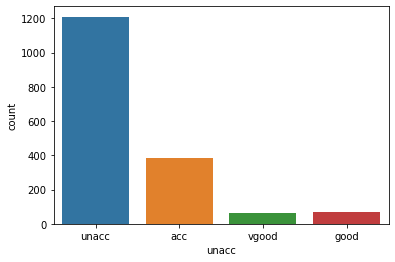

In [10]:
sns.countplot(x = df['unacc'])

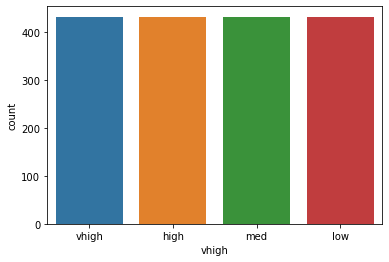

In [11]:
sns.countplot(x = df['vhigh'])

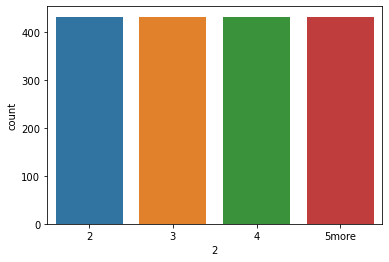

In [15]:
sns.countplot(x = df['2'])

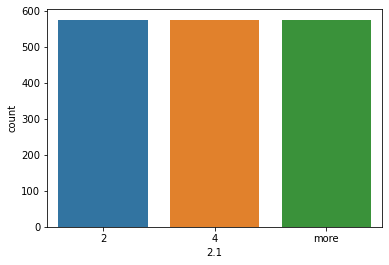

In [16]:
sns.countplot(x = df['2.1'])

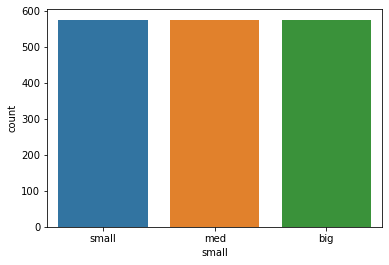

In [17]:
sns.countplot(x = df['small'])

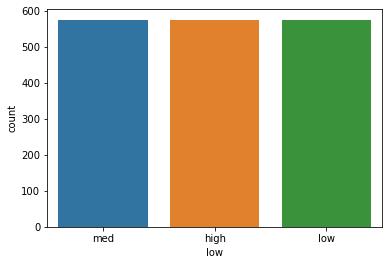

In [18]:
sns.countplot(x = df['low'])

In [29]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [31]:
df.drop(['vhigh.1'],axis=1,inplace = True)

In [32]:
df.head()

,vhigh,2,2.1,small,low,unacc
0,vhigh,2,2,small,med,unacc
1,vhigh,2,2,small,high,unacc
2,vhigh,2,2,med,low,unacc
3,vhigh,2,2,med,med,unacc
4,vhigh,2,2,med,high,unacc


In [33]:
X = df.iloc[:,:5]

In [72]:
y = df.iloc[:,-1]

In [73]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [75]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['vhigh','2','2.1','small','low'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [155]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5)

In [156]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [157]:
y_pred_gini = DTC.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8064


In [159]:
y_pred_train_gini = DTC.predict(X_train)
y_pred_train_gini

array(['unacc', 'acc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [160]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8211


In [161]:
print('Training set score: {:.4f}'.format(DTC.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(DTC.score(X_test, y_test)))

Training set score: 0.8211
Test set score: 0.8064


<IPython.core.display.Javascript object>

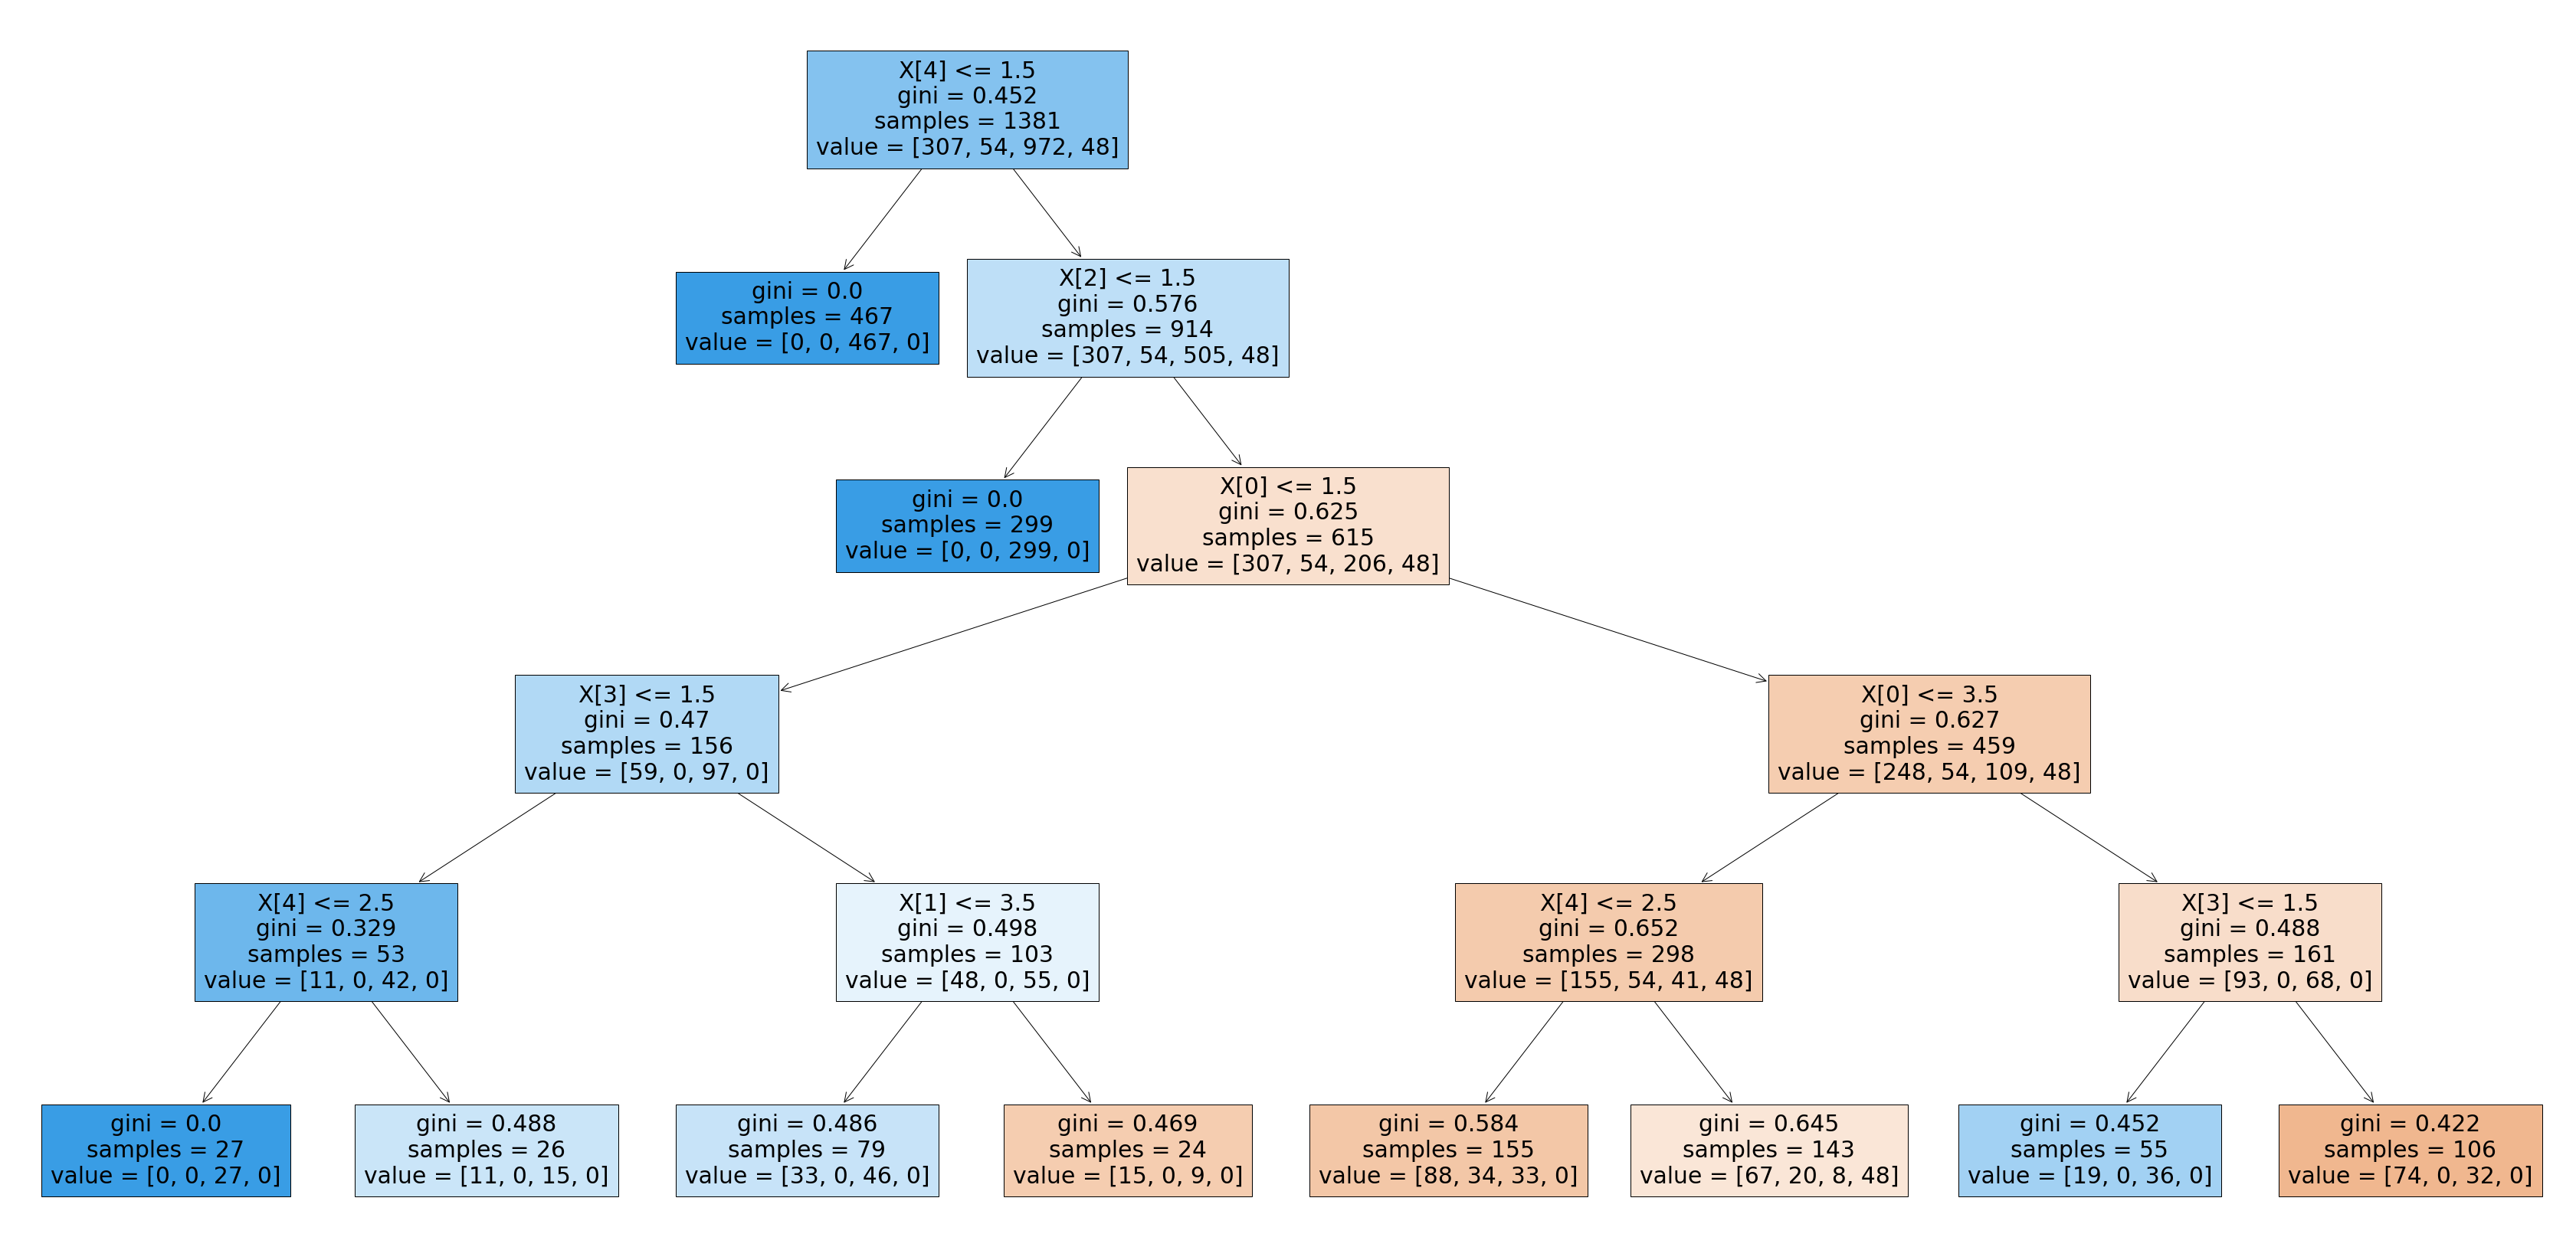

In [163]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(DTC, filled=True);

In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 63   0  14   0]
 [ 15   0   0   0]
 [ 21   0 216   0]
 [ 17   0   0   0]]


In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.54      0.82      0.65        77
        good       0.00      0.00      0.00        15
       unacc       0.94      0.91      0.93       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.81       346
   macro avg       0.37      0.43      0.39       346
weighted avg       0.76      0.81      0.78       346



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
